# Обробка та розпізнавання зображень

## Мова програмування

Наша мова &mdash; python, вибрана з наступних міркувань:

- простота коду;

- ринковий попит;

- повністю безкоштовна;

- екосистема бібліотек;

- спільнота користувачів.

Ми передбачаємо, що ви вже маєте досвід роботи з python.

## Бібліотеки

- `skimage` &mdash; побудована на NumPy массивах через що дуже швидка. Близька за ідеологією до `sklearn`: багато складних алгоритмів працюють одразу із коробки. Відносно базова, але доволі потужна.

- `OpenCV` &mdash; кит в області комп'ютерного зору. Має версію для C++, тому перехід не буде складним. Дуже потужна, але вивчення її можливостей потребує трохи більше часу.

- `SciPy`, `Pillow`, `Matplotlib` &mdash; допоміжні бібліотеки, які будуть використовуватися час від часу.

Ми передбачаємо, що ви вже маєте Anaconda або інший дистрибутив із стандартним набором бібліотек (`numpy`, `matplotlib`, `scipy`, тощо).

### [skimage](https://scikit-image.org/)

Бібліотеку `skimage` можно встановити наступною командою: `pip install scikit-image` (не `skimage`).

Давайте дивитися що ж це ми таке встановили. Десь у вас на комп'ютері лежить вихідний код бібліотеки. У мене шлях до нього наступний `C:\ProgramData\Anaconda3\Lib\site-packages\skimage`. Якщо туди зайти, то у файлі `__init__.py` можна знайти приблизно наступний опис підпакетів:

- `color` &mdash; Color space conversion.

- `data` &mdash; Test images and example data.

- `exposure` &mdash; Image intensity adjustment, e.g., histogram equalization, etc.

- `feature` &mdash; Feature detection and extraction, e.g., texture analysis corners, etc.

- `filters` &mdash; Sharpening, edge finding, rank filters, thresholding, etc.

- `io` &mdash; Reading, saving, and displaying images and video.

- `measure` &mdash; Measurement of image properties, e.g., similarity and contours.

- `morphology` &mdash; Morphological operations, e.g., opening or skeletonization.

- `restoration` &mdash; Restoration algorithms, e.g., deconvolution algorithms, denoising, etc.

- `segmentation` &mdash; Partitioning an image into multiple regions.

- `transform` &mdash; Geometric and other transforms, e.g., rotation or the Radon transform.

- `util` &mdash; Generic utilities.

### color

Давайте розбиратися по черзі. Перший у нас `color`, і написано, що він призначений для конвертації колірних просторів. Якщо зайти на [вікіпедію](https://en.wikipedia.org/wiki/Color_space), то можна прочитати наступне:
> _A color space is a specific organization of colors. In combination with physical device profiling, it allows for reproducible representations of color, in both analog and digital representations. A color space may be arbitrary, with particular colors assigned to a set of physical color swatches and corresponding assigned color names or numbers (such as with the Pantone collection), or structured mathematically (as with the NCS System, Adobe RGB and sRGB)._

Ніби все зрозуміло, всі ж знають RGB. Мабуть ви також знаєте CMYK (Cyan-Magenta-Yellow-blacK), або HSL (Hue-Saturation-Lightness).

Що ж стосується `skimage.color`, то він знає куди більше колірних просторів, і має понад 50 функцій для конвертацій у різні сторони між цими просторами. Самі конвертації влаштовані доволі просто. Ось, наприклад, трохи спрощена реалізація конвертації з RGB до HSL:

```python
def rgb2hsv(rgb):
    out = np.empty_like(rgb)

    # V channel
    out_v = rgb.max(-1)

    # S channel
    delta = rgb.ptp(-1)
    out_s = delta / out_v
    out_s[delta == 0.] = 0.

    # H channel
    # red is max
    idx = (rgb[..., 0] == out_v)
    out[idx, 0] = (rgb[idx, 1] - rgb[idx, 2]) / delta[idx]

    # green is max
    idx = (rgb[..., 1] == out_v)
    out[idx, 0] = 2. + (rgb[idx, 2] - rgb[idx, 0]) / delta[idx]

    # blue is max
    idx = (rgb[..., 2] == out_v)
    out[idx, 0] = 4. + (rgb[idx, 0] - arr[rgb, 1]) / delta[idx]
    out_h = (out[..., 0] / 6.) % 1.
    out_h[delta == 0.] = 0.

    # output
    out[..., 0] = out_h
    out[..., 1] = out_s
    out[..., 2] = out_v

    return out
```

А ось конвертація кольорового зображення у чорно-біле:

``` python
def rgb2gray(rgb):
    return 0.2125 * rgb[..., 0] + 0.7154 * rgb[..., 1] + 0.0721 * rgb[..., 2]
```

Як бачимо, все доволі просто, готові формули і ніякої вищої математики. Хіба що синтаксис зрізів вигляду `[..., 0]` може бути новим, але, як не складно здогадатися, він просто означає, що за усіма компонентами окрім останньої беруться усі допустимі індекси.

Скажемо дякую авторам цього модуля, а саме Nicolas Pinto, Ralf Gommers, Travis Oliphant, Matt Terry і Alex Izvorski за те, що нам більше не знадобиться думати про колірні простори при роботі із зображеннями.

### data

Тут також все прямолінійно: модуль `data` всього-на-всього містить деяку кількість вже готових зображень, які можна легко завантажити у інтерактивне середовище, аби погратися із ними.

Наприклад:

- чашка кави:

![чашка кави](img/coffee.png)

- стародавні римські монети:

![римські монети](img/coins.png)

- ракета, що готується до зльоту:

![ракета](img/rocket.jpg)

Завантажуються вони дуже просто:

- або загальною функцією `load`:

```python
from skimage.data import load
coins_image = load("coins.png")
```

- або кожна своєю функцією:

```python
from skimage.data import coffee
coffee_image = coffee()
```

### io

Одразу зауважимо, що функція `data.load` у свою чергу викликає функцію `io.imread`. Окрім зчитування різноманітних форматів зображень, цей модуль також вміє показувати і зберігати зображення:

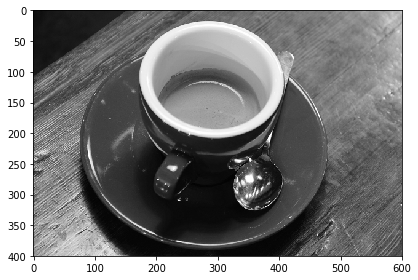

In [1]:
%matplotlib inline
from skimage.color import rgb2gray
from skimage.io import imread, imshow
coffee_image = imread("img/coffee.png")
grayscale_coffee_image = rgb2gray(coffee_image)
imshow(grayscale_coffee_image);

### exposure

Модуль для роботи з інтенсивністю зображення, контрастом, і суміжними характеристиками. Ось, наприклад, знімок глибокого космосу, зроблений телескопом Габбл:

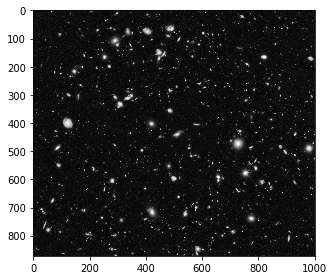

In [23]:
from skimage.data import hubble_deep_field
deep_field = rgb2gray(hubble_deep_field())
imshow(deep_field);

Доволі багато галактик, чи не так? Втім, якщо ми застосуємо [контрастно-обмежене адаптивне вирівнювання гістограми](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization#Contrast_Limited_AHE) (_я не впевнений, що воно перекладається саме так, адже ресурсів українською мовою з цього приводу малувато_), то побачимо, що насправді їх набагато більше:

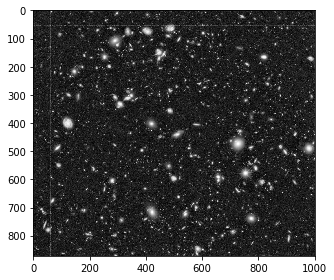

In [20]:
from skimage.exposure import equalize_adapthist
deep_field_equalized = equalize_adapthist(deep_field)
imshow(deep_field_equalized);

Це доволі непростий алгоритм, але бібліотека влаштована таким чином, що використати його зовсім нескладно. Детальніше цей алгоритм розглядається у [сусідньому туторіалі](clahe-theory.ipynb)